In [53]:
import cv2 as cv

In [54]:
import matplotlib.pyplot as plt 

In [55]:
net=cv.dnn.readNetFromTensorflow("graph_opt.pb")

In [56]:
inWidth = 368
inHeight = 368
thr = 0.2

In [57]:
BODY_PARTS = { "Nose": 0, "Neck": 1, "RShoulder": 2, "RElbow": 3, "RWrist": 4,
               "LShoulder": 5, "LElbow": 6, "LWrist": 7, "RHip": 8, "RKnee": 9,
               "RAnkle": 10, "LHip": 11, "LKnee": 12, "LAnkle": 13, "REye": 14,
               "LEye": 15, "REar": 16, "LEar": 17, "Background": 18 }

POSE_PAIRS = [ ["Neck", "RShoulder"], ["Neck", "LShoulder"], ["RShoulder", "RElbow"],
               ["RElbow", "RWrist"], ["LShoulder", "LElbow"], ["LElbow", "LWrist"],
               ["Neck", "RHip"], ["RHip", "RKnee"], ["RKnee", "RAnkle"], ["Neck", "LHip"],
               ["LHip", "LKnee"], ["LKnee", "LAnkle"], ["Neck", "Nose"], ["Nose", "REye"],
               ["REye", "REar"], ["Nose", "LEye"], ["LEye", "LEar"] ]

In [58]:
def body_measurements(x1,x2,points):
    #x2=2right
    #x1=5left
    lx=points[x1][0] 
    rx=points[x2][0] 
    ly=points[x1][1] 
    ry=points[x2][1] 

    dist=((lx-rx)**2+(ly-ry)**2)**(1/2)
    print(dist)


In [59]:
img = cv.imread("arth1.jpeg")

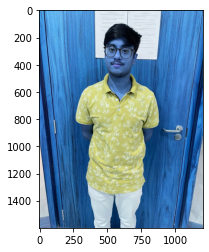

In [60]:
plt.imshow(img)

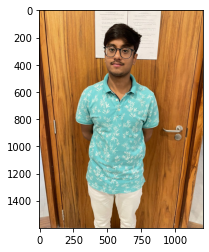

In [61]:
plt.imshow(cv.cvtColor(img,cv.COLOR_BGR2RGB))

In [62]:
def pose_estimation(frame):
    frameWidth = frame.shape[1]
    frameHeight = frame.shape[0]
    net.setInput(cv.dnn.blobFromImage(frame,1.0,(inWidth,inHeight),(127.5,127.5,127.5),swapRB=True, crop=False))
    out = net.forward()
    out = out[:, :19, :, :]  # MobileNet output [1, 57, -1, -1], we only need the first 19 elements
    assert(len(BODY_PARTS) == out.shape[1])

    points = []
    for i in range(len(BODY_PARTS)):
        # Slice heatmap of corresponging body's part.
        heatMap = out[0, i, :, :]

        # Originally, we try to find all the local maximums. To simplify a sample
        # we just find a global one. However only a single pose at the same time
        # could be detected this way.
        _, conf, _, point = cv.minMaxLoc(heatMap)
        x = (frameWidth * point[0]) / out.shape[3]
        y = (frameHeight * point[1]) / out.shape[2]
        # Add a point if it's confidence is higher than threshold.
        points.append((int(x), int(y)) )

    for pair in POSE_PAIRS:
        partFrom = pair[0]
        partTo = pair[1]
        assert(partFrom in BODY_PARTS)
        assert(partTo in BODY_PARTS)

        idFrom = BODY_PARTS[partFrom]
        idTo = BODY_PARTS[partTo]

        if points[idFrom] and points[idTo]:
            cv.line(frame, points[idFrom], points[idTo], (0, 255, 0), 3)
            cv.ellipse(frame, points[idFrom], (3, 3), 0, 0, 360, (0, 0, 255), cv.FILLED)
            cv.ellipse(frame, points[idTo], (3, 3), 0, 0, 360, (0, 0, 255), cv.FILLED)

    t, _ = net.getPerfProfile()
    freq = cv.getTickFrequency() / 1000
    cv.putText(frame, '%.2fms' % (t / freq), (10, 20), cv.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 0))
    #print(out[0])
    # print(points)
    return frame,points

In [63]:
estimated_image,points= pose_estimation(img)
print('shoulder width:')
print()
body_measurements(5,2,points)
print('waist:')
print()
body_measurements(10,11,points)

shoulder width:

417.0
waist:

520.2480177761372


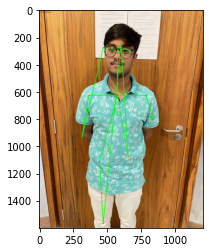

In [64]:
plt.imshow(cv.cvtColor(estimated_image,cv.COLOR_BGR2RGB))

In [65]:
# cap=cv.VideoCapture('vid.mp4')
# cap.set(3,800)
# cap.set(4,800)
# if not cap.isOpened():
#     raise IOError("Cannot open video")

# while cv.waitKey(1)<0:
#     hasFrame,frame=cap.read()
#     if not hasFrame:
#         cv.waitKey()
#         break
#     frameWidth = frame.shape[1]
#     frameHeight = frame.shape[0]
#     net.setInput(cv.dnn.blobFromImage(frame,1.0,(inWidth,inHeight),(127.5,127.5,127.5),swapRB=True, crop=False))
#     out = net.forward()
#     out = out[:, :19, :, :]  # MobileNet output [1, 57, -1, -1], we only need the first 19 elements
#     assert(len(BODY_PARTS) == out.shape[1])

#     points = []
#     for i in range(len(BODY_PARTS)):
#         # Slice heatmap of corresponging body's part.
#         heatMap = out[0, i, :, :]

#         # Originally, we try to find all the local maximums. To simplify a sample
#         # we just find a global one. However only a single pose at the same time
#         # could be detected this way.
#         _, conf, _, point = cv.minMaxLoc(heatMap)
#         x = (frameWidth * point[0]) / out.shape[3]
#         y = (frameHeight * point[1]) / out.shape[2]
#         # Add a point if it's confidence is higher than threshold.
#         points.append((int(x), int(y)) if conf > thr else None)

#     for pair in POSE_PAIRS:
#         partFrom = pair[0]
#         partTo = pair[1]
#         assert(partFrom in BODY_PARTS)
#         assert(partTo in BODY_PARTS)

#         idFrom = BODY_PARTS[partFrom]
#         idTo = BODY_PARTS[partTo]

#         if points[idFrom] and points[idTo]:
#             cv.line(frame, points[idFrom], points[idTo], (0, 255, 0), 3)
#             cv.ellipse(frame, points[idFrom], (3, 3), 0, 0, 360, (0, 0, 255), cv.FILLED)
#             cv.ellipse(frame, points[idTo], (3, 3), 0, 0, 360, (0, 0, 255), cv.FILLED)

#     t, _ = net.getPerfProfile()
#     freq = cv.getTickFrequency() / 1000
#     cv.putText(frame, '%.2fms' % (t / freq), (10, 20), cv.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 0))
#     cv.imshow('Pose estimation',frame)


    
    